# Breast Cancer Research Project

### Import packages

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.simplefilter('ignore')

In [510]:
data = pd.read_csv("breast cancer data.csv")

### Train_Test_Split & Data Preprocessing

In [511]:
#Drop Unnamed column
data = data.drop(columns = ['Unnamed: 32'])

#Transform diagonsis to 0 and 1
#data['diagnosis']
data['Target'] = 0 #set B = 0
data['Target'][data['diagnosis'] == 'M'] = 1

#Drop diagnosis and create Target
data_target = data.drop(columns = ['diagnosis'])

#Feature Engineering
#Add id_length as new feature
id_str = data_target.id.astype('str')
id_length = id_str.apply(len)
data_target['id_length'] = id_length

#Drop id
data_target = data_target.drop(columns = ['id'])

#Train Test Split
X_label = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'id_length']
X_train, X_test, y_train, y_test = train_test_split(data_target.loc[:,X_label], 
                                                    data_target.Target, test_size=0.2, random_state=42)


### Exploratory Data Analysis

In [512]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,id_length
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,6
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,6
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,6
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,8
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,6


In [513]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,id_length
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.117635,19.185033,91.882242,654.377582,0.095744,0.103619,0.088898,0.048280,0.181099,0.062757,...,25.535692,107.103121,876.987033,0.131532,0.252742,0.274595,0.114182,0.290502,0.083868,6.389011
std,3.535815,4.266005,24.322027,354.943187,0.013923,0.052470,0.079468,0.038060,0.027487,0.007210,...,6.065108,33.374664,567.672841,0.023083,0.155014,0.209398,0.065326,0.063151,0.017848,0.888181
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,4.000000
25%,11.705000,16.170000,75.100000,420.300000,0.085825,0.062890,0.029320,0.020340,0.161850,0.057645,...,21.045000,84.255000,516.450000,0.114400,0.144950,0.116550,0.063930,0.249500,0.071050,6.000000
50%,13.300000,18.680000,85.980000,551.700000,0.094620,0.090970,0.061540,0.033410,0.179200,0.061480,...,25.220000,97.670000,686.600000,0.130900,0.210100,0.226400,0.098610,0.282700,0.080060,6.000000
75%,15.740000,21.585000,103.750000,767.600000,0.104550,0.131300,0.132350,0.073895,0.195800,0.066100,...,29.690000,124.650000,1031.500000,0.146050,0.341600,0.387200,0.161100,0.317750,0.092070,7.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000,9.000000


In [514]:
X_train.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
id_length                  0
dtype: int64

In [515]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 68 to 102
Data columns (total 31 columns):
radius_mean                455 non-null float64
texture_mean               455 non-null float64
perimeter_mean             455 non-null float64
area_mean                  455 non-null float64
smoothness_mean            455 non-null float64
compactness_mean           455 non-null float64
concavity_mean             455 non-null float64
concave points_mean        455 non-null float64
symmetry_mean              455 non-null float64
fractal_dimension_mean     455 non-null float64
radius_se                  455 non-null float64
texture_se                 455 non-null float64
perimeter_se               455 non-null float64
area_se                    455 non-null float64
smoothness_se              455 non-null float64
compactness_se             455 non-null float64
concavity_se               455 non-null float64
concave points_se          455 non-null float64
symmetry_se                455

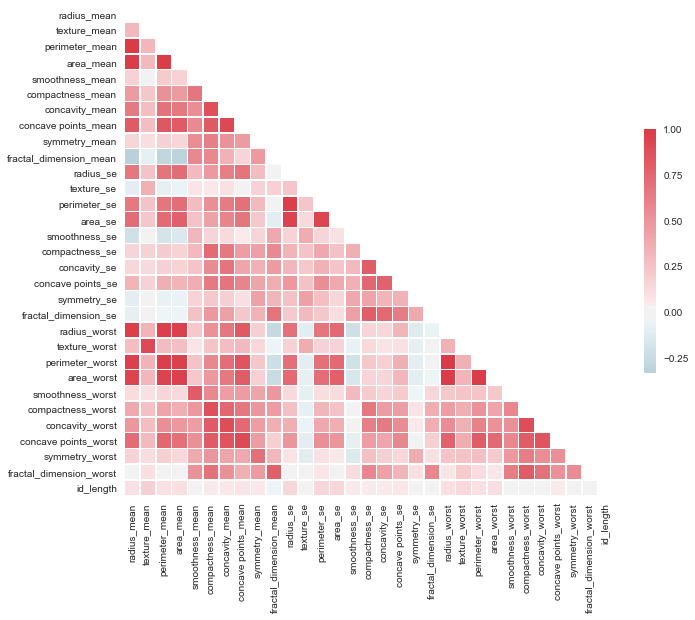

In [518]:
sns.set(style="white")
corr = X_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5,1,'Count for Benign and Malicious')

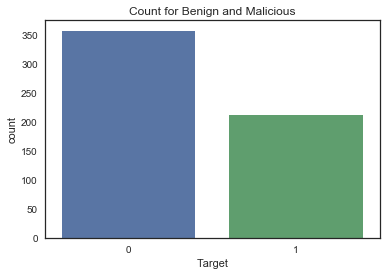

In [519]:
sns.countplot(data['Target']).set_title("Count for Benign and Malicious")

In [523]:
len(predictor)
print(k)

30


Through the plot above, we can see the data is balanced.

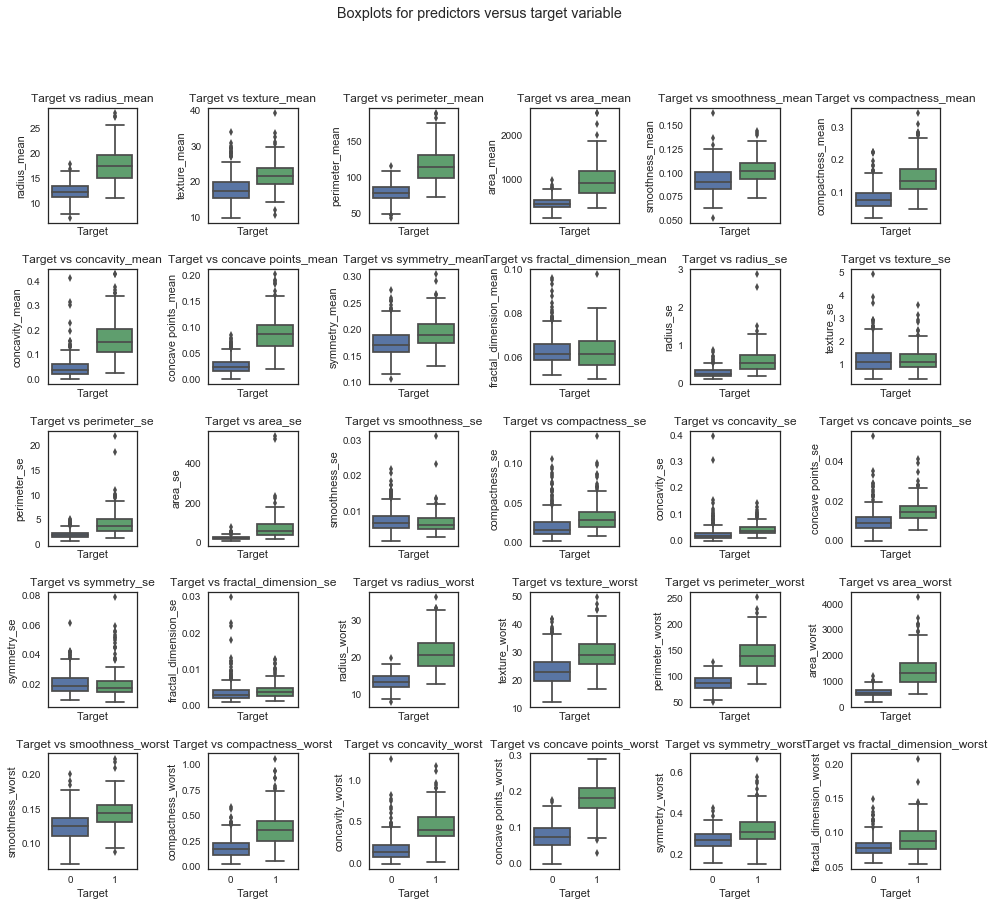

In [528]:
def boxplot(pred,x,y):
    res,pred='Target', pred
    dat=data.loc[:,[res,pred]]
    sns.boxplot(x=dat[res],y=dat[pred],ax=axes[x,y]).set_title(str(res)+" vs "+str(pred))

predictor = list(data.columns[2:-1])
y = list(range(6))
x = list(range(7))


f, axes = plt.subplots(5, 6, figsize=(16, 14), sharex=True)
plt.subplots_adjust(hspace=0.4, wspace=0.8)
plt.suptitle("Boxplots for predictors versus target variable")

k = 0
for i in x:
    for j in y:
        if k == 30: break
        boxplot(predictor[k],i,j)
        k += 1

### Standardize Variables

In [529]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = pd.DataFrame(scaler.transform(X_train))
X_train_stand.columns = list(X_train.columns)
X_train_stand.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,id_length
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-3.347749e-16,-4.599495e-17,-8.808583e-17,3.589314e-16,-2.000841e-16,1.927640e-16,-1.037022e-16,2.383929e-16,1.277366e-16,4.289609e-16,...,-6.734540e-16,-2.513252e-17,1.917880e-16,-2.098444e-17,-2.318048e-16,-6.636938e-17,-8.174170e-17,4.750779e-16,2.440051e-19,-4.648296e-16
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.819583e+00,-2.223500e+00,-1.809497e+00,-1.365036e+00,-3.100011e+00,-1.607228e+00,-1.119899e+00,-1.269910e+00,-2.345430e+00,-1.776889e+00,...,-2.230887e+00,-1.578174e+00,-1.152259e+00,-2.617938e+00,-1.455995e+00,-1.312795e+00,-1.749805e+00,-2.124261e+00,-1.616973e+00,-2.692740e+00
25%,-6.830930e-01,-7.075360e-01,-6.907613e-01,-6.602049e-01,-7.132037e-01,-7.770872e-01,-7.505387e-01,-7.349048e-01,-7.010461e-01,-7.097920e-01,...,-7.412292e-01,-6.853483e-01,-6.358132e-01,-7.430298e-01,-6.961323e-01,-7.555873e-01,-7.700987e-01,-6.499846e-01,-7.189616e-01,-4.384682e-01
50%,-2.314983e-01,-1.185158e-01,-2.429378e-01,-2.895973e-01,-8.082013e-02,-2.413402e-01,-3.446456e-01,-3.911235e-01,-6.915087e-02,-1.772851e-01,...,-5.210786e-02,-2.829543e-01,-3.357508e-01,-2.741590e-02,-2.753858e-01,-2.304110e-01,-2.386392e-01,-1.236838e-01,-2.135847e-01,-4.384682e-01
75%,4.593426e-01,5.631988e-01,4.884799e-01,3.193386e-01,6.331729e-01,5.281282e-01,5.473870e-01,6.737569e-01,5.354290e-01,4.642225e-01,...,6.857059e-01,5.263332e-01,2.724862e-01,6.296478e-01,5.738568e-01,5.383496e-01,7.189995e-01,4.319440e-01,4.600643e-01,6.886675e-01
max,3.961679e+00,4.715674e+00,3.976811e+00,5.208312e+00,4.864642e+00,3.964311e+00,4.256736e+00,4.022271e+00,4.476124e+00,4.815921e+00,...,3.962127e+00,4.322305e+00,5.955420e+00,3.767506e+00,4.424833e+00,4.672828e+00,2.709674e+00,5.917679e+00,4.999482e+00,2.942939e+00


In [530]:
#Use standard scaler from training set to transform test set
X_test_stand = pd.DataFrame(scaler.transform(X_test))
X_test_stand.columns = list(X_test.columns)
X_test_stand.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,id_length
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.013646,0.122535,0.017830,0.007201,0.221165,0.068724,-0.006214,0.083927,0.011485,0.028305,...,0.116600,0.023669,0.031653,0.181071,0.049100,-0.057415,0.032431,-0.033756,0.021829,0.095438
std,0.988660,1.040208,1.000636,0.961985,1.036461,1.035952,1.021289,1.097223,0.992086,0.896593,...,1.065744,1.039061,1.019901,0.935980,1.077585,0.985520,1.035893,0.898566,1.063886,0.962623
min,-2.020606,-1.934857,-1.979489,-1.440906,-1.974735,-1.298143,-1.119899,-1.269910,-2.735129,-1.401981,...,-2.153309,-1.700557,-1.219978,-1.888446,-1.277428,-1.312795,-1.749805,-2.122676,-1.392050,-2.692740
25%,-0.688048,-0.696389,-0.685616,-0.664929,-0.487250,-0.648016,-0.741311,-0.747991,-0.652789,-0.601138,...,-0.705742,-0.692622,-0.654683,-0.414498,-0.658029,-0.822782,-0.688571,-0.616695,-0.643239,-0.438468
50%,-0.184782,0.082127,-0.185313,-0.298059,0.240225,-0.115512,-0.326757,-0.376920,-0.061867,-0.163400,...,0.041976,-0.298402,-0.345274,0.187268,-0.240189,-0.220610,-0.194351,-0.153011,-0.230973,-0.438468
75%,0.549237,0.818988,0.552278,0.429900,0.805739,0.461351,0.382989,0.649361,0.467141,0.506573,...,0.743889,0.662064,0.589038,0.591699,0.410305,0.455402,0.808649,0.450571,0.462869,0.688668
max,3.143429,2.800772,3.277087,3.451170,2.973603,4.613008,3.609222,3.583010,3.988090,2.731716,...,3.569287,3.206460,4.505809,3.949663,5.200453,3.970043,2.643778,4.018557,6.934611,2.942939


### Random Forest Classifier

In [531]:
X_label = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'id_length']
y_label = ['Target']
X = X_train_stand
y = y_train

In [532]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=11)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

In [533]:
temp = list(clf.predict(X_train_stand)) == y_train
sum(temp)/len(temp)

0.9802197802197802

### Feature Importance from Random Forest

In [534]:
rf_imp = pd.DataFrame({'variable': X.columns, 'importance': clf.feature_importances_}).sort_values(by='importance', ascending=False)
rf_imp

,importance,variable
27,0.136502,concave points_worst
7,0.133244,concave points_mean
23,0.126794,area_worst
20,0.117215,radius_worst
22,0.115485,perimeter_worst
6,0.048272,concavity_mean
2,0.043532,perimeter_mean
26,0.041527,concavity_worst
0,0.041042,radius_mean
3,0.034597,area_mean


In [537]:
clf.predict(X_train_stand)
temp = list(clf.predict(X_train_stand)) == y_train
print("Accuracy for the training set: ", sum(temp)/len(temp))

Accuracy for the training set:  0.9802197802197802


In [538]:
clf.predict(X_test_stand)
temp = list(clf.predict(X_test_stand)) == y_test
print("Accuracy for the test set: ", sum(temp)/len(temp))

Accuracy for the test set:  0.9649122807017544


### KNN Classifier

In [540]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Create the RFE object and compute a cross-validated score.
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train_stand,y_train)

temp = list(KNN.predict(X_train_stand)) == y_train
print("Accuracy for the training set: ", sum(temp)/len(temp))

temp = list(KNN.predict(X_test_stand)) == y_test
print("Accuracy for the test set: ", sum(temp)/len(temp))

Accuracy for the training set:  1.0
Accuracy for the test set:  0.9298245614035088


### ROC for KNN classifier with Cross Validation

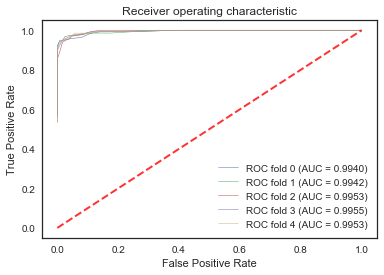

[0.9560439560439561, 0.9560439560439561, 0.967032967032967, 0.945054945054945, 0.9340659340659341]


In [545]:
#KFold, k=5
from scipy import interp
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
train_score = list()
valid_score = list()

i = 0
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X_train_stand.iloc[train_index,:], X_train_stand.iloc[test_index,:]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    KNN = KNeighborsClassifier(n_neighbors=20)
    KNN.fit(X_train_cv, y_train_cv)
    
    Y_pred_proba = KNN.predict_proba(X_train_cv)[::,1]
    pred_train=KNN.predict(X_train_cv)
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_train_cv,Y_pred_proba)
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=0.5, alpha=1,
             label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
    i += 1
    
    KNN.fit(X_train_cv, y_train_cv)
    train_score.append(KNN.score(X_train_cv, y_train_cv))
    valid_score.append(KNN.score(X_test_cv, y_test_cv))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# plt.plot(mean_fpr, mean_tpr, color='black',
#          label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
#          lw=2, alpha=.8)

plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print(valid_score)

In [546]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Y_test_pred=KNN.predict(X_test_stand)
confusion_matrix = confusion_matrix(y_test, Y_test_pred)
print("*******************Confusion Matrix******************")
print(confusion_matrix)
print("****************Classification Report****************")
print(classification_report(y_test, Y_test_pred))

*******************Confusion Matrix******************
[[70  1]
 [ 4 39]]
****************Classification Report****************
             precision    recall  f1-score   support

          0       0.95      0.99      0.97        71
          1       0.97      0.91      0.94        43

avg / total       0.96      0.96      0.96       114



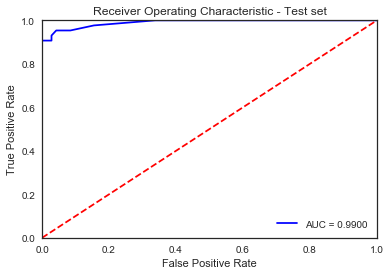

Accuracy rate:  0.956140350877193


In [555]:
Y_pred_proba = KNN.predict_proba(X_test_stand)[::,1]
pred_test=KNN.predict(X_test_stand)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,Y_pred_proba)
roc_auc = sklearn.metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic - Test set')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy rate: ",str(KNN.score(X_test_stand,y_test)))

### Logistic Regression

In [541]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=2, penalty = 'l1')
logit_clf = logit.fit(X_train_stand,y_train)

In [543]:
temp = list(logit.predict(X_train_stand) == y_train)
print("Accuracy for the training set: ", sum(temp)/len(temp))

temp = list(logit.predict(X_test_stand) == y_test)
print("Accuracy for the test set: ", sum(temp)/len(temp))

Accuracy for the training set:  0.989010989010989
Accuracy for the test set:  0.9736842105263158


### ROC for the logsitic regression with KFold Cross Validation

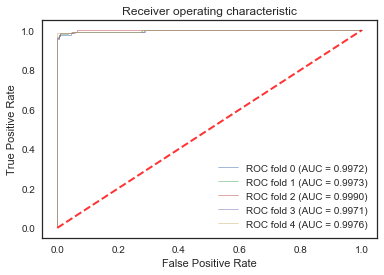

In [544]:
#KFold, k=5
from scipy import interp
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
train_score = list()
valid_score = list()

i = 0
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X_train_stand.iloc[train_index,:], X_train_stand.iloc[test_index,:]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    logreg_cv = LogisticRegression(random_state=2, penalty = 'l1')
    logreg_cv.fit(X_train_cv, y_train_cv)
    
    Y_pred_proba = logit.predict_proba(X_train_cv)[::,1]
    pred_train=logreg_cv.predict(X_train_cv)
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_train_cv,Y_pred_proba)
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=0.5, alpha=1,
             label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
    i += 1
    
    logreg_cv.fit(X_train_cv, y_train_cv)
    train_score.append(logit.score(X_train_cv, y_train_cv))
    valid_score.append(logit.score(X_test_cv, y_test_cv))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# plt.plot(mean_fpr, mean_tpr, color='black',
#          label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
#          lw=2, alpha=.8)

plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [548]:
print('training_score : ',train_score)
print('validation_score : ', valid_score)
print("The mean for validation score: ", np.array(train_score).mean())

training_score :  [0.9615384615384616, 0.9532967032967034, 0.9505494505494505, 0.9532967032967034, 0.9587912087912088]
validation_score :  [0.9560439560439561, 0.9560439560439561, 0.967032967032967, 0.945054945054945, 0.9340659340659341]
The mean for validation score:  0.9554945054945054


In [549]:
coeff = logit.coef_
coeff_table = pd.DataFrame(coeff.reshape(31,1))
coeff_table = pd.concat([pd.DataFrame(X.columns),coeff_table],axis=1)
coeff_table.columns = ['Predictors','Coefficients']
coeff_table_sort = coeff_table.sort_values(by='Coefficients', ascending=True)
coeff_table_sort

,Predictors,Coefficients
15,compactness_se,-0.884977
18,symmetry_se,-0.454312
11,texture_se,-0.371302
19,fractal_dimension_se,-0.280357
8,symmetry_mean,-0.029122
25,compactness_worst,0.000000
22,perimeter_worst,0.000000
17,concave points_se,0.000000
16,concavity_se,0.000000
29,fractal_dimension_worst,0.000000


In [550]:
import sklearn
pred_test = logit.predict(X_test_stand)
probs=logit.predict_proba(X_test_stand)
print("Accuracy Rate: ",sklearn.metrics.accuracy_score(y_test, pred_test))

Accuracy Rate:  0.9736842105263158


In [551]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Y_test_pred=logit.predict(X_test_stand)
confusion_matrix = confusion_matrix(y_test, Y_test_pred)
print("*******************Confusion Matrix******************")
print(confusion_matrix)
print("****************Classification Report****************")
print(classification_report(y_test, Y_test_pred))


*******************Confusion Matrix******************
[[69  2]
 [ 1 42]]
****************Classification Report****************
             precision    recall  f1-score   support

          0       0.99      0.97      0.98        71
          1       0.95      0.98      0.97        43

avg / total       0.97      0.97      0.97       114



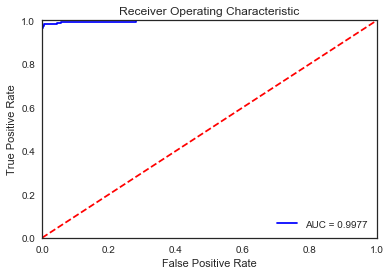

Accuracy rate:  0.989010989010989


In [552]:
Y_pred_proba = logit.predict_proba(X_train_stand)[::,1]
pred_train=logit.predict(X_train_stand)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_train,Y_pred_proba)
roc_auc = sklearn.metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy rate: ",str(logit.score(X_train_stand,y_train)))

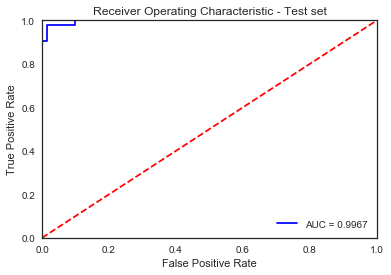

Accuracy rate:  0.9736842105263158


In [553]:
Y_pred_proba = logit.predict_proba(X_test_stand)[::,1]
pred_test=logit.predict(X_test_stand)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,Y_pred_proba)
roc_auc = sklearn.metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic - Test set')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy rate: ",str(logit.score(X_test_stand,y_test)))